<a href="https://colab.research.google.com/github/18520133/CS112.L11/blob/main/BaoCaoCK_PTTKTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cProfile
import numpy as np
import random

In [ ]:
import sys
print(sys.getrecursionlimit())

10000


In [ ]:
sys.setrecursionlimit(10000)

##Hàm giải quyết bài toán subset-sum sử dụng ***Backtracking***

In [ ]:
def isSubsetSum(set, n, sum):
  #Trường hợp đặc biệt
  if (sum==0):
    return True
  if (n==0 and sum!=0):
    return False
  #
  if (set[n-1]>sum):
    return isSubsetSum(set, n-1, sum)
  return isSubsetSum(set, n-1, sum) or isSubsetSum(set, n-1, sum-set[n-1])

In [ ]:
#Chạy thử để chứng minh với thầy là code đúng
A=[10,109,45,31,78]
sum=81
isSubsetSum(A,5,sum)

False

In [ ]:
#Chạy thử để chứng minh với thầy là code đúng
A=[10,109,45,31,78]
sum=55
isSubsetSum(A,5,sum)

True

##Hàm giải quyết bài toán subset-sum sử dụng ***Dynamic Programming***

In [ ]:
def isSubsetSum(set, n, sum):
     
    # Tạo mảng 2 chiều subset có kích thước là (n+1)x(sum+1), gán tất cả các giá trị trong mảng là False
    subset =([[False for i in range(sum + 1)] 
            for i in range(n + 1)])
     
    # Nếu sum=0 thì kết quả trả về là True
    for i in range(n + 1):
        subset[i][0] = True
         
    # Nếu sum!=0, set khác rỗng thì kết quả trả về là False
    for i in range(1, sum + 1):
         subset[0][i]= False
             
    # Điền mảng subset theo công thức Dynamic Programming đã thiết kế
    for i in range(1, n + 1):
        for j in range(1, sum + 1):
            if j<set[i-1]:
                subset[i][j] = subset[i-1][j]
            if j>= set[i-1]:
                subset[i][j] = (subset[i-1][j] or
                                subset[i - 1][j-set[i-1]])
    return subset[n][sum]

In [ ]:
#Chạy thử để chứng minh với thầy là code đúng
A=[10,109,45,31,78]
sum=81
isSubsetSum(A,5,sum)

False

In [ ]:
#Chạy thử để chứng minh với thầy là code đúng
A=[10,109,45,31,78]
sum=55
isSubsetSum(A,5,sum)

True

##Tạo bộ test case nhẫu nhiên

In [ ]:
# Hàm tạo mảng
def generateArray(n,min,max,_t):
  random.seed(_t)
  lst = []
  for i in range(n):
    lst.append(random.randint(min, max))
  return lst
   

In [ ]:
# Hàm ghi file để lưu trữ bộ test case cho thầy xem
def writeFile(f, n, arr, sum):
  f.write(str(n))
  f.write('\n')
  for element in arr:
    f.write(str(element)+' ')
  f.write('\n')
  f.write(str(sum))

# tạo các giá trị để sử dụng trong việc random test case
start=1000
end=10
size=[50,100,250,500,750,1000,1500,2500,3500,5000]
end_list=[500,15000,30000,30000,100000]
dem=1
_t=1

# tạo test case
for i in range(10): # chạy 10 giá trị n (kích thước mảng)
  n=size[i]
  for j in range(3): # với mỗi giá trị n tạo 3 test case có kết quà trả về là True
    f = open('drive/My Drive/data/input/input'+str(dem)+'.txt','w') 
    f1 = open('drive/My Drive/data/output/output'+str(dem)+'.txt','w')
    
    end=end_list[j]
    
    d = generateArray(n,start,end,_t)
    sum= random.randint(min(d),random.randint(min(d),min(d)*1000))
    while sum in d:
      sum= random.randint(min(d),random.randint(min(d),min(d)*1000))
    while(isSubsetSum(d,n,sum)==False):
      d = generateArray(n,start,end,_t)
      _t += 1
    writeFile(f, len(d), d, sum)
    f.close()
    f1.write(str(isSubsetSum(d,n,sum)))
    f1.close()
    print('len',n)
    print('dem',dem)
    print('max(A)', max(d))
    print(isSubsetSum(d,n,sum))
    dem+=1
  
  for j in range(3, 5): # Với mỗi giá trị n tạo 2 test case có kết quà trả về là False
    f = open('drive/My Drive/data/input/input'+str(dem)+'.txt','w')
    f1 = open('drive/My Drive/data/output/output'+str(dem)+'.txt','w')
    
    end=end_list[j]
    
    d = generateArray(n,start,end,_t)
    sum= 0
    writeFile(f, len(d), d, sum)
    f1.write('False')
    f1.close()
    print('len',n)
    print('dem',dem)
    print('max(A)', max(d))
    print(isSubsetSum(d,n,sum))
    #cProfile.run('for i in range(200): isSubsetSum(d,n,sum)')
    dem+=1


len 5000
dem 49
max(A) 29997
True
len 5000
dem 50
max(A) 99977
True


In [ ]:
f = open('drive/My Drive/data/input/input'+str(50)+'.txt')
text = f.readlines()
n = int(text[0])
arr = text[1].split(' ')
del(arr[-1])
arr = [int(element) for element in arr]
print(n)
print(arr)
print(max(arr))
print(min(arr))
f.close()

5000
[72367, 60952, 20247, 25990, 77367, 71102, 26264, 36857, 63847, 43362, 68540, 2079, 62275, 24823, 64143, 73032, 73378, 50439, 69843, 25340, 84073, 67784, 1669, 90859, 75464, 42831, 82668, 34366, 55917, 94320, 74745, 40026, 45083, 33809, 99876, 61764, 17272, 8147, 6656, 81096, 31002, 90663, 84089, 4315, 14214, 18068, 85168, 83261, 96831, 11832, 5523, 92555, 44279, 83973, 94815, 26069, 12387, 39602, 30865, 96206, 96022, 3319, 30352, 1850, 70309, 86332, 7365, 8734, 69829, 85635, 2401, 86719, 41396, 44641, 46953, 56366, 87829, 65363, 99247, 10225, 47662, 27159, 49400, 83980, 40940, 56511, 36566, 62626, 72899, 81099, 81620, 40482, 80792, 30223, 38528, 18618, 26851, 45021, 87673, 82086, 57309, 85110, 37647, 88661, 35996, 85898, 57847, 45734, 18007, 41244, 70034, 54248, 64424, 91171, 11111, 59567, 77601, 65182, 42459, 38063, 17552, 18370, 52331, 83098, 2306, 25335, 26330, 52572, 24559, 26559, 36187, 48714, 52444, 78388, 83407, 42250, 38767, 33964, 80522, 11268, 89496, 71983, 46124, 30048

In [ ]:
tong = 0
for element in arr:
  tong += element
print('Tong toan bo phan tu trong mang la:', tong)

Tong toan bo phan tu trong mang la: 251800656


In [ ]:
# lô tô sum để tìm sum có kết quả trả về là False
for i in range(3000,3500):
  print(i, isSubsetSum(arr, n, i))

In [ ]:
# ghi lại sum vừa tìm được vào file input 
f = open('drive/My Drive/data/input/input'+str(50)+'.txt', 'w')
writeFile(f, n, arr, 3007)
f.close()

#Phân tích thực nghiệm

In [ ]:
# Cài đặt thư viện xlsxwriter để đọc và ghi file xlsx
!pip install xlsxwriter

     |████████████████████████████████| 153kB 12.3MB/s 


##Phân tích thực nghiệm ***Backtracking***

Các test không chạy được: 5, 9, 10, 20, 25, 30, 35, 40, 44,45, 54, 56, 57, 59, 60

Lí do: Các testcase này đều là False nên thời gian chạy quá lâu nên nhóm bỏ qua



In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(1,5):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         1843 function calls (13 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1840/10    0.001    0.000    0.001    0.000 <ipython-input-14-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         1039813 function calls (13 primitive calls) in 0.287 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
1039810/10    0.287    0.000    0.287    0.029 <ipython-input-14-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.287    0.287 <string>:1(<module>)
        1    0.000    0.000    0.287    0.287 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profile

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(6,9):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         1383 function calls (13 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1380/10    0.001    0.000    0.001    0.000 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         130963 function calls (13 primitive calls) in 0.049 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
130960/10    0.049    0.000    0.049    0.005 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.049    0.049 <string>:1(<module>)
        1    0.000    0.000    0.049    0.049 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(11,19):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         11253 function calls (13 primitive calls) in 0.007 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 11250/10    0.007    0.000    0.007    0.001 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.007    0.007 <string>:1(<module>)
        1    0.000    0.000    0.007    0.007 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         15403 function calls (13 primitive calls) in 0.005 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 15400/10    0.005    0.000    0.005    0.001 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.005    0.005 <string>:1(<module>)
        1    0.000    0.000    0.005    0.005 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(19,20):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         218823 function calls (13 primitive calls) in 0.077 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
218820/10    0.076    0.000    0.076    0.008 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.077    0.077 <string>:1(<module>)
        1    0.000    0.000    0.077    0.077 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(21,25):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         10273 function calls (13 primitive calls) in 0.007 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 10270/10    0.007    0.000    0.007    0.001 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.007    0.007 <string>:1(<module>)
        1    0.000    0.000    0.007    0.007 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         37343 function calls (13 primitive calls) in 0.015 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 37340/10    0.015    0.000    0.015    0.001 <ipython-input-9-0396b1afff7e>:1(isSubsetSum)
        1    0.000    0.000    0.015    0.015 <string>:1(<module>)
        1    0.000    0.000    0.015    0.015 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(26,30):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         21063 function calls (13 primitive calls) in 0.012 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 21060/10    0.012    0.000    0.012    0.001 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.012    0.012 <string>:1(<module>)
        1    0.000    0.000    0.012    0.012 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         354923 function calls (13 primitive calls) in 0.122 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
354920/10    0.122    0.000    0.122    0.012 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.122    0.122 <string>:1(<module>)
        1    0.000    0.000    0.122    0.122 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(31,35):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         24253 function calls (13 primitive calls) in 0.014 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 24250/10    0.014    0.000    0.014    0.001 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.014    0.014 <string>:1(<module>)
        1    0.000    0.000    0.014    0.014 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         635313 function calls (13 primitive calls) in 0.221 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
635310/10    0.221    0.000    0.221    0.022 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.221    0.221 <string>:1(<module>)
        1    0.000    0.000    0.221    0.221 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(36,40):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         27073 function calls (13 primitive calls) in 0.016 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 27070/10    0.015    0.000    0.015    0.002 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.015    0.015 <string>:1(<module>)
        1    0.000    0.000    0.016    0.016 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         50043 function calls (13 primitive calls) in 0.085 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 50040/10    0.085    0.000    0.085    0.009 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.085    0.085 <string>:1(<module>)
        1    0.000    0.000    0.085    0.085 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler'

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(41,44):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         63443 function calls (13 primitive calls) in 0.080 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 63440/10    0.080    0.000    0.080    0.008 <ipython-input-6-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    0.080    0.080 <string>:1(<module>)
        1    0.000    0.000    0.080    0.080 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         74103 function calls (13 primitive calls) in 0.039 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 74100/10    0.039    0.000    0.039    0.004 <ipython-input-6-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    0.039    0.039 <string>:1(<module>)
        1    0.000    0.000    0.039    0.039 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(46,50):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         65553 function calls (13 primitive calls) in 0.095 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 65550/10    0.095    0.000    0.095    0.009 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.095    0.095 <string>:1(<module>)
        1    0.000    0.000    0.095    0.095 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         112023 function calls (13 primitive calls) in 0.054 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
112020/10    0.054    0.000    0.054    0.005 <ipython-input-41-375e50cfdd14>:6(isSubsetSum)
        1    0.000    0.000    0.054    0.054 <string>:1(<module>)
        1    0.000    0.000    0.054    0.054 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(50,54):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         7608633 function calls (13 primitive calls) in 5.817 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
7608630/10    5.817    0.000    5.817    0.582 <ipython-input-62-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    5.817    5.817 <string>:1(<module>)
        1    0.000    0.000    5.817    5.817 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         33 function calls (13 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    30/10    0.000    0.000    0.000    0.000 <ipython-input-62-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler'

In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(55,56):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         1023 function calls (13 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1020/10    0.001    0.000    0.001    0.000 <ipython-input-62-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(58,59):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         33 function calls (13 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    30/10    0.000    0.000    0.000    0.000 <ipython-input-62-a6d7235064fe>:1(isSubsetSum)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
# import các thư viện cần thiết
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Đọc file data vừa thu được 
data = pd.read_csv('testBacktracking.csv')
print(data)
data.columns = ['n', 'max(A)','time','sum','n*sum','n/max(A)']

      50     497  0.001   497.1     24850  0.100603622
0     50   14769  0.287   14563    728150     0.003385
1     50   29538  0.315   29127   1456350     0.001693
2     50    9953  0.006    1341     67050     0.005024
3    100     499  0.001     513     51300     0.200401
4    100   14913  0.049   12220   1222000     0.006706
5    100   29825  0.048   24440   2444000     0.003353
6    250     499  0.007     128     32000     0.501002
7    250   14913  0.005    8160   2040000     0.016764
8    250   29825  0.029   16321   4080250     0.008382
9    250    9977  0.004     191     47750     0.025058
10   250     997  0.004      14      3500     0.250752
11   500     500  0.003     809    404500     1.000000
12   500   14983  0.012    9040   4520000     0.033371
13   500   29965  0.064   18081   9040500     0.016686
14   500    9977  0.077     399    199500     0.050115
15   750     500  0.007      30     22500     1.500000
16   750   14983  0.015    9842   7381500     0.050057
17   750  

###Vẽ biểu đồ để xét sự phụ thuộc của thời gian chạy của Backtracking

(0.0, 0.5)

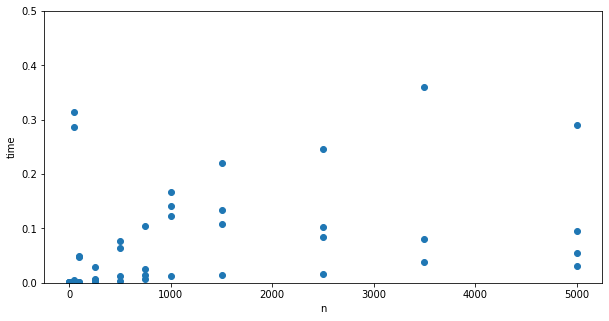

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n'], data['time'])
plt.xlabel('n')
plt.ylabel('time')
plt.ylim(0,0.5)

(0.0, 0.5)

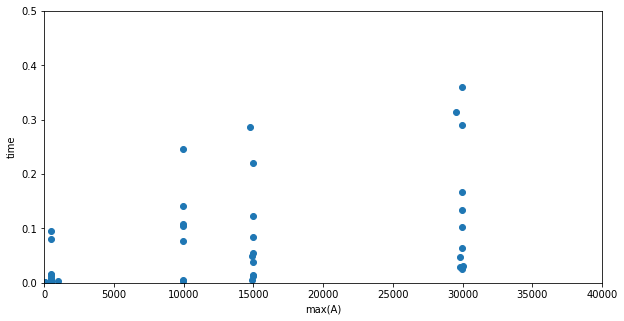

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['max(A)'], data['time'])
plt.xlabel('max(A)')
plt.ylabel('time')
plt.xlim(0,40000)
plt.ylim(0,0.5)

(0.0, 40000.0)

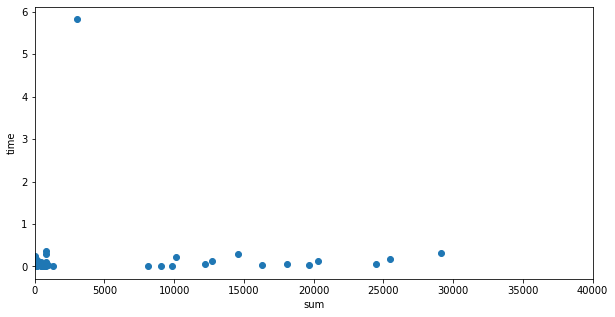

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['sum'], data['time'])
plt.xlabel('sum')
plt.ylabel('time')
plt.xlim(0,40000)

Text(0, 0.5, 'time')

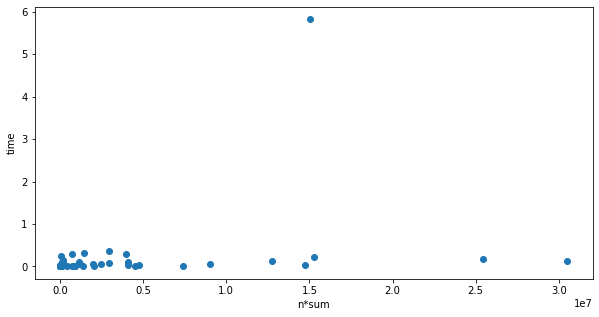

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n*sum'], data['time'])
plt.xlabel('n*sum')
plt.ylabel('time')

Text(0, 0.5, 'time')

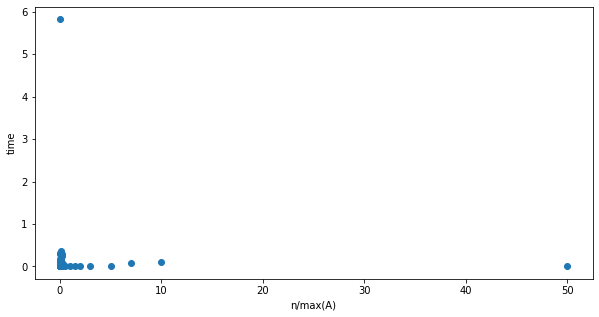

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n/max(A)'], data['time'])
plt.xlabel('n/max(A)')
plt.ylabel('time')

In [ ]:
X = data['n'].values.reshape(-1,1)

####Hàm tìm hệ số X

In [ ]:
def Find_X(_X):
  regr = LinearRegression()
  regr.fit(_X, data['time'])
  return regr.coef_

In [ ]:
result = []

####Hàm lg(n)

In [ ]:
X_ = np.log2(X)
re = Find_X(X_)
print(re)
result.append(re)

[0.0506443]


####Hàm sqrt(n)

In [ ]:
X_ = np.sqrt(X)
re = Find_X(X_)
print(re)
result.append(re)

[0.01256722]


####Hàm n

In [ ]:
re = Find_X(X)
print(re)
result.append(re)

[0.00019637]


####Hàm n*log(n)

In [ ]:
X_ = X*np.log2(X)
re = Find_X(X_)
print(re)
result.append(re)

[1.62812312e-05]


####Hàm pow(n,2)

In [ ]:
X_ = X**2
re = Find_X(X_)
print(re)
result.append(re)

[4.43603207e-08]


####Hàm pow(2,n)

In [ ]:
X_ = 2**X
re = Find_X(X_)
print(re)
result.append(re)

[0.]


##Phân tích thực nghiệm ***Dynamic Programming***

Các test không chạy được: 40, 45, 51

Lí do: Các testcase này đều là False nhưng chạy cả ngày mà vẫn không ra nên nhóm bỏ qua

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xlsxwriter
import cProfile
workbook = xlsxwriter.Workbook('drive/My Drive/emperical_analysis_result.xlsx') 
worksheet = workbook.add_worksheet("Result")

# Đo thời gian chạy thực nghiệm
for i in range(1,61):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         523 function calls in 0.090 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    0.078    0.008    0.089    0.009 <ipython-input-2-937e91ab33f7>:1(isSubsetSum)
      510    0.011    0.000    0.011    0.000 <ipython-input-2-937e91ab33f7>:6(<listcomp>)
        1    0.001    0.001    0.090    0.090 <string>:1(<module>)
        1    0.000    0.000    0.090    0.090 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         523 function calls in 1.893 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    1.637    0.164    1.876    0.188 <ipython-input-2-937e91ab33f7>:1(isSubsetSum)
      510    0.239    0.000    0.239    0.000 <ipython-input-2-937e91ab33f7>:6(<listcomp>)
        1    0.017    0.017    1.893    1.893 <string>:1(<module>)
        1    0.000    0.000  

In [ ]:
for i in range(46,61):
  f = open('drive/My Drive/data/input/input'+str(i)+'.txt', 'r')
  text = f.readlines()
  n = int(text[0])
  arr = text[1].split(' ')
  sum = int(text[2])
  del(arr[-1])
  arr = [int(element) for element in arr]
  cProfile.run('for i in range(10): isSubsetSum(arr,n,sum)')
  f.close()

         50023 function calls in 11.094 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    9.152    0.915   10.914    1.091 <ipython-input-3-937e91ab33f7>:1(isSubsetSum)
    50010    1.723    0.000    1.723    0.000 <ipython-input-3-937e91ab33f7>:6(<listcomp>)
        1    0.218    0.218   11.133   11.133 <string>:1(<module>)
        1    0.000    0.000   11.133   11.133 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         50023 function calls in 5.532 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    4.556    0.456    5.452    0.545 <ipython-input-3-937e91ab33f7>:1(isSubsetSum)
    50010    0.864    0.000    0.864    0.000 <ipython-input-3-937e91ab33f7>:6(<listcomp>)
        1    0.112    0.112    5.564    5.564 <string>:1(<module>)
        1    0.000    0.

In [ ]:
# import các thư viện cần thiết
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Đọc file data vừa thu được 
data = pd.read_csv('testDynamicProgramming.csv')
print(data)
data.columns = ['n', 'max(A)','time','sum','n*sum','n/max(A)']

      50     497      0.09     745       37250  0.100603622
0     50   14769     1.893   14563      728150     0.003385
1     50   29538     9.516   29127     1456350     0.001693
2     50    9953     0.160    1341       67050     0.005024
3     50     993    10.936   38247     1912350     0.050352
4    100     499     0.133     513       51300     0.200401
5    100   14913     2.920   12220     1222000     0.006706
6    100   29825     6.014   24440     2444000     0.003353
7    100    9953   161.924  534200    53420000     0.010047
8    100     997    25.784   60433     6043300     0.100301
9    250     499     0.066     128       32000     0.501002
10   250   14913     4.655    8160     2040000     0.016764
11   250   29825     9.424   16321     4080250     0.008382
12   250    9977     0.098     191       47750     0.025058
13   250     997     0.008      14        3500     0.250752
14   500     500     0.968     809      404500     1.000000
15   500   14983    11.067    9040     4

###Vẽ biểu đồ để xét sự phụ thuộc của thời gian chạy của Dynamic Programming

Text(0, 0.5, 'time')

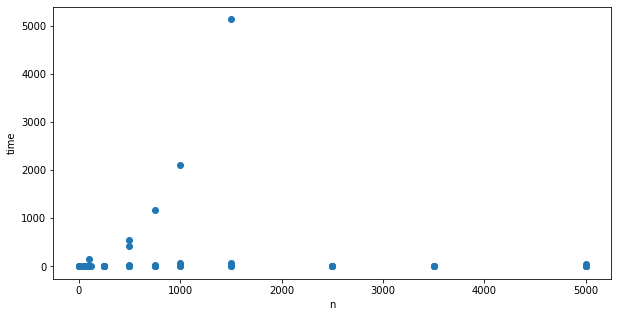

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n'], data['time'])
plt.xlabel('n')
plt.ylabel('time')
#plt.xlim(0,1000)

Text(0, 0.5, 'time')

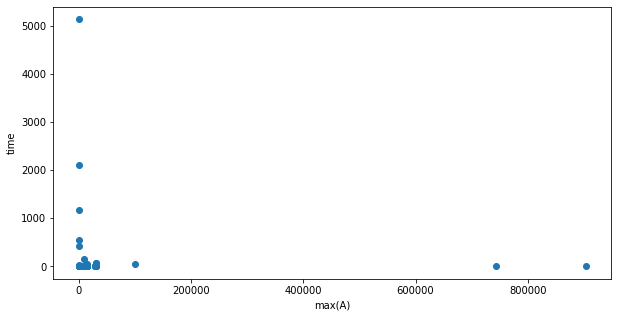

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['max(A)'], data['time'])
plt.xlabel('max(A)')
plt.ylabel('time')
#plt.xlim(0,1000)

Text(0, 0.5, 'time')

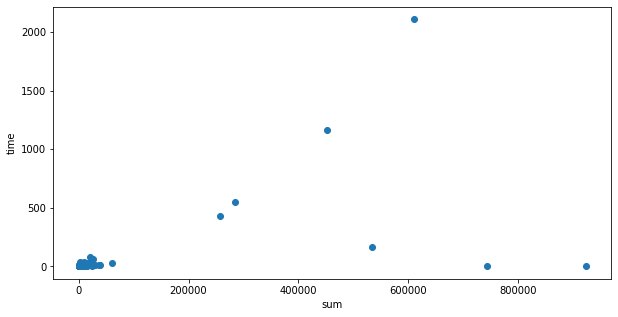

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['sum'], data['time'])
plt.xlabel('sum')
plt.ylabel('time')

Text(0, 0.5, 'time')

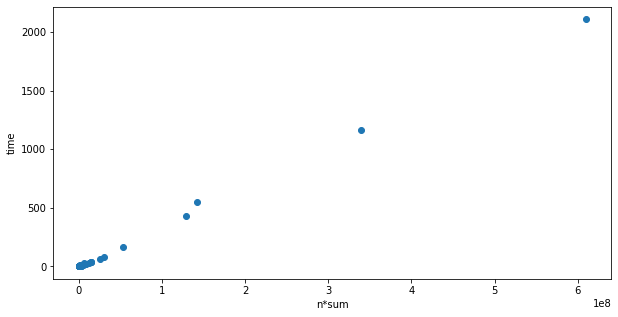

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n*sum'], data['time'])
plt.xlabel('n*sum')
plt.ylabel('time')

Text(0, 0.5, 'time')

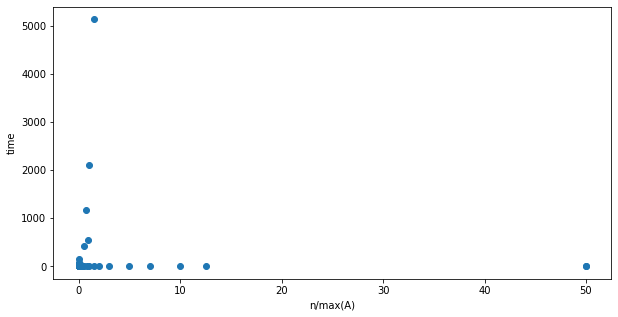

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['n/max(A)'], data['time'])
plt.xlabel('n/max(A)')
plt.ylabel('time')

In [ ]:
X = data['n*sum'].values.reshape(-1,1)

####Hàm tìm hệ số X

In [ ]:
def Find_X(_X):
  regr = LinearRegression()
  regr.fit(_X, data['time'])
  return regr.coef_

In [ ]:
result = []

####Hàm lg(n.sum)

In [ ]:
X_ = np.log2(X)
re = Find_X(X_)
print(re)
result.append(re)

[67.42434703]

####Hàm sqrt(n.sum)

In [ ]:
X_ = np.sqrt(X)
re = Find_X(X_)
print(re)
result.append(re)

[0.10773601]

####Hàm n.sum

In [ ]:
re = Find_X(X)
print(re)
result.append(re)

[3.51433438e-06]


####Hàm (n.sum) * log(n.sum)

In [ ]:
X_ = X*np.log2(X)
re = Find_X(X_)
print(re)
result.append(re)

[1.16422437e-07]


####Hàm pow(n.sum,2)

In [ ]:
X_ = X**2
re = Find_X(X_)
print(re)
result.append(re)

[2.5105807e-15]


####Hàm pow(2,n.sum)

In [ ]:
from decimal import *
ns = data['n']
hai_mu_n = []
for j in range(len(ns)-2):
  hai_mu_n.append(2**Decimal(ns[j].item()))
hai_mu_n.append(0)
hai_mu_n.append(0)
data['pow(2,n.sum)'] = hai_mu_n
tg = data['time'][:-2]

do_lech = []
for i in range(len(ns)-2):
  do_lech.append((Decimal(hai_mu_n[i]) - Decimal(tg[i]))**2)

do_lech.append(0)

sum = 0
for i in range(len(do_lech)-2):
  sum = Decimal(sum) + Decimal(do_lech[i])

do_lech.append(Decimal(sum)/(Decimal(len(do_lech)-2)))

data['squared error pow(2,n.sum)'] = do_lech


In [ ]:
data.to_excel("data_final_dynamic_programming.xlsx")

#Hàm in ra các solutions sử dụng Backtracking

In [ ]:
def sum_of_subset(s,k,rem):
    x[k]=1
    if s+my_list[k]==target_sum:
        list1=[]
        for i in range (0,k+1):
            if x[i]==1:
                list1.append(my_list[i])
        print(list1)      
    elif s+my_list[k]+my_list[k+1]<=target_sum :
        sum_of_subset(s+my_list[k],k+1,rem-my_list[k])
    if s+rem-my_list[k]>=target_sum and s+my_list[k+1]<=target_sum :
        x[k]=0
        sum_of_subset(s,k+1,rem-my_list[k])

my_list=[]
n=int(input("Enter number of elements: "))
total=0
for i in range (0,n):
    ele=int(input())
    my_list.append(ele) 
    total=total+ele
my_list.sort()    
target_sum=int(input("Enter required Sum: "))    
x=[0]*(n+1)
sum_of_subset(0,0,total)     

Enter number of elements: 4
1
2
3
4
Enter required Sum: 6
[1, 2, 3]
[2, 4]


#Hàm in ra solution cuối cùng tìm được sử dụng Brute force

#Nếu kết quả trả về là True thì in solution cuối cùng, nếu kết quả trả về là False thì in solution cuối cùng có subset gần bằng sum nhất

In [ ]:
import numpy as np
import itertools

def find_closese_sum(numbers, targets):
    numbers = numbers[:]
    for t in targets:
        if not numbers:
            break
        combs = sum([list(itertools.combinations(numbers, r))
                     for r in range(1, len(numbers)+1)], [])
        sums = np.asarray(list(map(sum, combs)))
        bestcomb = combs[np.argmin(np.abs(np.asarray(sums) - t))]
        numbers = list(set(numbers).difference(bestcomb))
        print(format(bestcomb))

In [ ]:
numbers=[1,2,4,5,7,9]
targets=[19]
find_closese_sum(numbers,targets)

(1, 2, 7, 9)
